In [52]:
import numpy as np
import librosa
from matplotlib import pyplot as plt

In [53]:
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

In [54]:
example_file = "chords_wav\Amaj.wav"
y, sr = librosa.load(example_file, offset=0, duration=30)

[Text(0.5, 1.0, 'MFCC')]

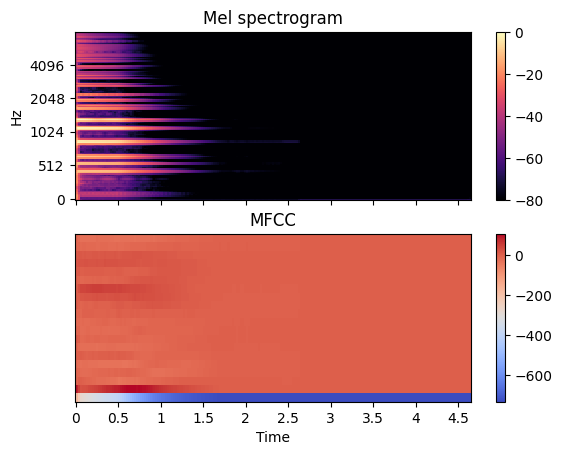

In [56]:
S = get_melspectrogram(example_file)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

mfcc = get_mfcc(example_file)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram pour un La maj')
ax[0].label_outer()
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC pour un La maj')

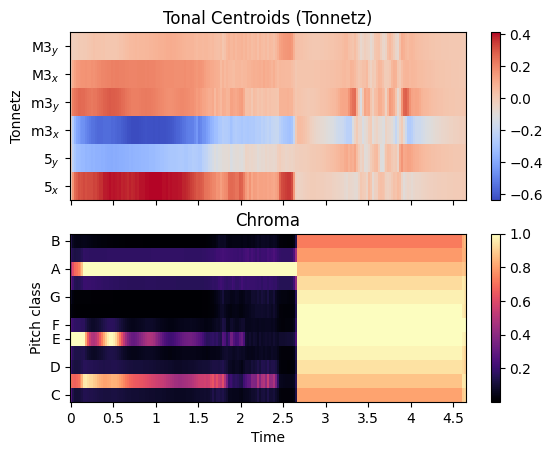

In [25]:
import matplotlib.pyplot as plt
chroma = get_chroma_vector(example_file)
tntz = get_tonnetz(example_file)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tntz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz) pour un La maj')
ax[0].label_outer()
img2 = librosa.display.specshow(chroma,
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma pour un La maj')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])